# Fake / Real Job Posting
## Bu projedeki amacımız farklı ülkeredeki iş ilanlarını karşılaştırarak içlerinden NLP, Machine Learning ve Deep Learning modelleri yardımıyla sahte ilanları tespit etmek ve doğal dil işleme yöntemini kullanarak machine learning ve deep learning modelleri kurmak. 
### What is NLP ? 
### Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial  intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can 
### Doğal dil işleme (NLP), bilgisayarların metinleri ve konuşulan sözcükleri insanların anlayabileceği şekilde anlama yeteneği  kazandırmakla ilgilenen bilgisayar bilimi dalını - ve daha özel olarak yapay zeka veya AI dalı - ifade eder.

## Let's get to know the dataset

### Verisetimiz farklı ülkelerden 17880 gözlemden 18 feature(özellikten) dan oluşuyor.  sırasyla title, location, department, salary range(maaş aralığı), company profile, requirements(gerklilikler), benefits(faydalar), telecommuting(1 for remoute) has company logo, has question, employment type(çalışan tipi), required experience(gerekli olan tecrube),	required education(gerekli eğitim),	industry(şirketin alanı), function,	fraudulent(sahte). 
## Projenin Amacı...
### Bu datasetinde fraudulent sütünu hedef sütünumuz(bağımlı değişken). diğer 17 sütunumuz bağımsız değişkenimizdir. Bağımsız değişkenler yardımıyla bağımlı değişkenimizi tahmin etmeye çalışacağız.

# 1- Importing Necessary Librarys and Read the Dataset

## 1.1- Importing Necessary librarys

In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Nlp library
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

# sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

#Tenserflow Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

## 1.2 Read the Dataset 

In [28]:
df = pd.read_csv("../input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv", encoding= "UTF-8")

In [29]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [31]:
df.company_profile.head()

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
Name: company_profile, dtype: object

In [32]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [33]:
df.telecommuting.value_counts()##(1 for remote working)

0    17113
1      767
Name: telecommuting, dtype: int64

In [34]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [35]:
df.title.value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [36]:
type(df.title[0])

str

In [37]:
df.title = df.title.str.strip()

In [38]:
df.title.value_counts()

English Teacher Abroad                                         406
Customer Service Associate                                     198
Graduates: English Teacher Abroad (Conversational)             144
Customer Service Associate - Part Time                          91
Software Engineer                                               90
                                                              ... 
Sales Executive - Office Equipment                               1
QA/QC Leader - Cured Meats Co - Chicagoland                      1
Application Developer/SQL Server                                 1
Training Assistant                                               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [39]:
df.location.value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

In [40]:
df.department.value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

In [41]:
df.salary_range.value_counts()

0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

In [42]:
df.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [43]:
df.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [44]:
df.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [45]:
df.industry.value_counts()##sektör

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [46]:
df.function.value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

# 2-  Visualization #

## 2.1 Fraudelent

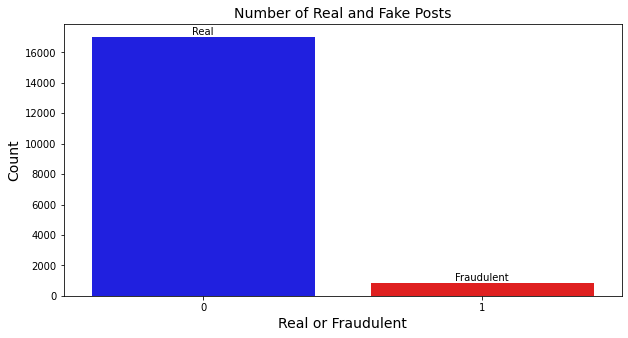

In [47]:
labels = ['Real', 'Fraudulent']
plt.figure(figsize = (10,5))
ax = sb.countplot("fraudulent", data = df, palette = ["blue", "red"])
ax.bar_label(ax.containers[0], fmt='%g', label_type = 'edge', labels = labels)
plt.title("Number of Real and Fake Posts", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14});
plt.xlabel('Real or Fraudulent', fontdict = {"fontsize" : 14})
plt.show()

## 2.2 Title Feature

In [48]:
title = df.title.value_counts()[:5]

In [49]:
title

English Teacher Abroad                                406
Customer Service Associate                            198
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate - Part Time                 91
Software Engineer                                      90
Name: title, dtype: int64

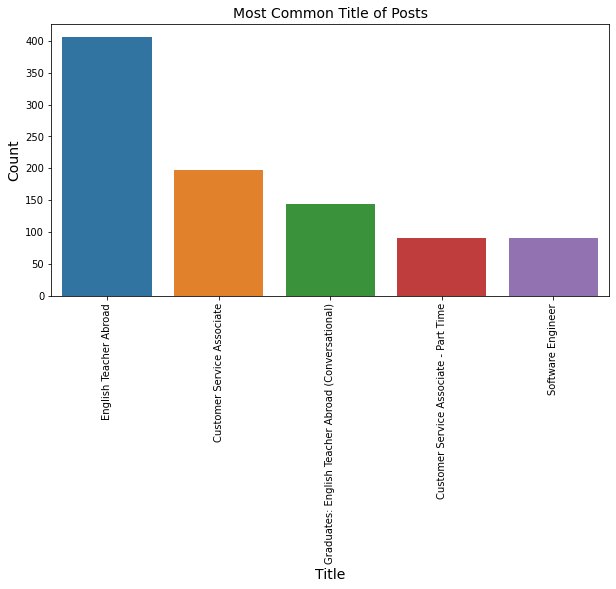

In [50]:
plt.figure(figsize = (10,5))
sb.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Title", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

## 2.3 Location Feature

In [51]:
location_of_fraudulent = df.location[df.fraudulent == 1].value_counts()[:5]

In [52]:
location = df.location.value_counts()[:5]

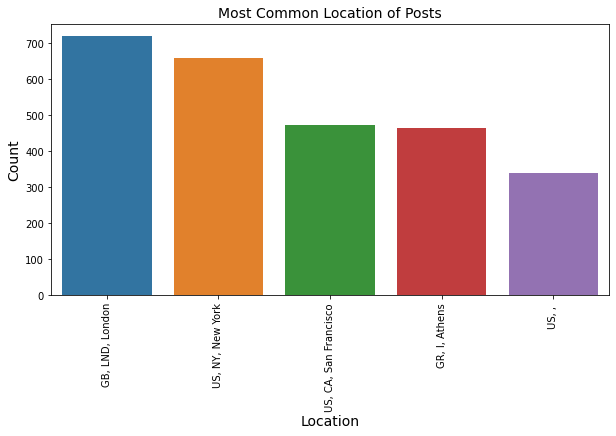

In [53]:
plt.figure(figsize = (10,5))
sb.barplot(x = location.index, y = location, )
plt.title("Most Common Location of Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Location", fontdict = {"fontsize" : 14})
plt.ylabel("Count", fontdict = {"fontsize" : 14})
plt.xticks(rotation=90);

## 2.4- Has Company Logo Feature 

In [54]:
has_company_logo1 = df.has_company_logo[df.fraudulent == 1]

In [55]:
has_company_logo1 = has_company_logo1.value_counts()### sahte ialanların 583 tanesi company logo ya sahip değil..

In [56]:
has_company_logo1

0    583
1    283
Name: has_company_logo, dtype: int64

In [57]:
palette = ["red", "blue" ]

#### Sahte ialanların 581 tanesinin Logosu yok

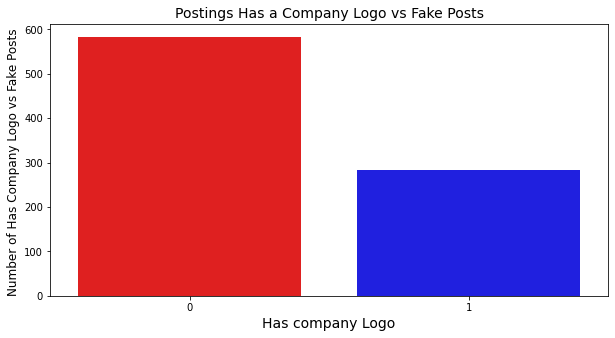

In [58]:
plt.figure(figsize = (10,5))
sb.barplot(x = has_company_logo1.index, y = has_company_logo1, palette = palette)
plt.title("Postings Has a Company Logo vs Fake Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Has company Logo", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Company Logo vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation=0);

## 2.5- Has Questions Feature

In [59]:
df.has_questions.value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

In [60]:
has_questions1 = df.has_questions[df.fraudulent == 1].value_counts()

In [61]:
has_questions1

0    616
1    250
Name: has_questions, dtype: int64

 #### sahte ilanların 616 tanesinde soru yok

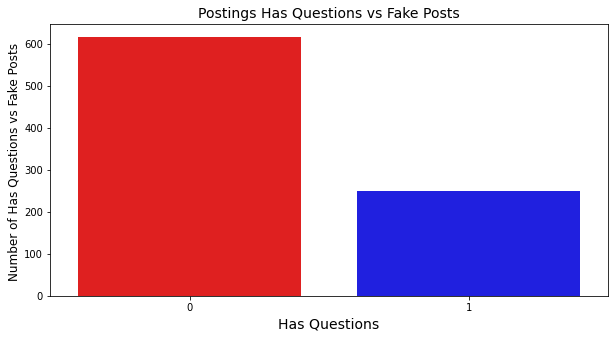

In [62]:
plt.figure(figsize = (10,5))
sb.barplot(x = has_questions1.index, y = has_questions1, palette = palette)
plt.title("Postings Has Questions vs Fake Posts", fontdict = {"fontsize" : 14})
plt.xlabel("Has Questions", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation=0);

## 2.6- Employment Type

In [63]:
employment_type = df.employment_type.value_counts()

In [64]:
employment_type

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

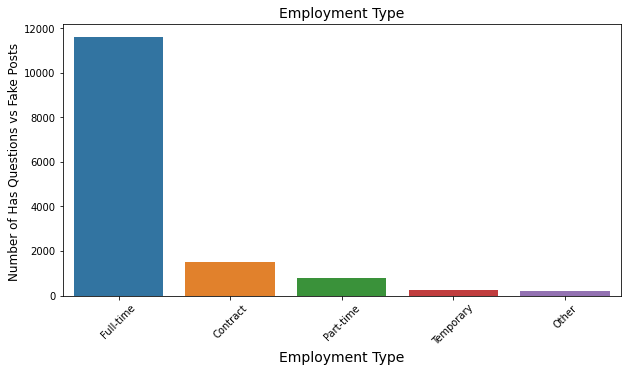

In [65]:
plt.figure(figsize = (10,5))
sb.barplot(x = employment_type.index, y = employment_type)
plt.title("Employment Type", fontdict = {"fontsize" : 14})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

# 3-  Statistical Analysis

In [66]:
corr = df.corr().fraudulent
corr

job_id              0.079872
telecommuting       0.034523
has_company_logo   -0.261971
has_questions      -0.091627
fraudulent          1.000000
Name: fraudulent, dtype: float64

# 4- Clean the Dataset

## 4.1- Crate the Text Feature

### Combine all text in a feaure and crate text feauture will make easier using NLP

In [67]:
df.fillna(" ", inplace = True)

In [68]:
df['text'] = df['title'] + " " + df['department'] + \
             " " + df['company_profile'] + " " + \
             df['description'] + " " + \
             df['requirements'] + " " +\
             df['benefits'] + " " +\
             df['function'] + " " +\
             df['required_experience']+ " "+\
             df["required_education"]+ " " +\
             df["industry"]

In [69]:
df['text'].head()

0    Marketing Intern Marketing We're Food52, and w...
1    Customer Service - Cloud Video Production Succ...
2    Commissioning Machinery Assistant (CMA)   Valo...
3    Account Executive - Washington DC Sales Our pa...
4    Bill Review Manager   SpotSource Solutions LLC...
Name: text, dtype: object

### Comined all text features in a single feature...

## 4.2- Droping the unnecessary features

In [70]:
df_last = df.drop(columns = ['job_id','title','location','department', 'telecommuting',
                             'salary_range','company_profile','description','requirements','benefits','employment_type',
                             'required_experience','required_education','industry','function'])
print(df_last.isna().sum())
df_last.head()

has_company_logo    0
has_questions       0
fraudulent          0
text                0
dtype: int64


,has_company_logo,has_questions,fraudulent,text
0,1,0,0,"Marketing Intern Marketing We're Food52, and w..."
1,1,0,0,Customer Service - Cloud Video Production Succ...
2,1,0,0,Commissioning Machinery Assistant (CMA) Valo...
3,1,0,0,Account Executive - Washington DC Sales Our pa...
4,1,1,0,Bill Review Manager SpotSource Solutions LLC...


## 4.3 An example for cleaning the dataset

In [71]:
first_description = df.description[1]

In [72]:
description = re.sub("[^a-zA-Z]", " ", first_description)

In [73]:
description = description.lower()

In [74]:
description

'organised   focused   vibrant   awesome do you have a passion for customer service  slick typing skills  maybe account management     and think administration is cooler than a polar bear on a jetski  then we need to hear you  we are the cloud video production service and opperating on a glodal level  yeah  it s pretty cool  serious about delivering a world class product and excellent customer service our rapidly expanding business is looking for a talented project manager to manage the successful delivery of video projects  manage client communications and drive the production process  work with some of the coolest brands on the planet and learn from a global team that are representing nz is a huge way we are entering the next growth stage of our business and growing quickly internationally   therefore  the position is bursting with opportunity for the right person entering the business at the right time     seconds  the worlds cloud video production service   http      url fbe    afa

In [75]:
description = nltk.word_tokenize(description)

In [76]:
len(description)

327

In [77]:
description = [ word for word in description if not word in set(stopwords.words("english"))]
len(description)

206

In [79]:
nltk.download('omw-1.4')
lemma = nlp.WordNetLemmatizer()
description = [lemma.lemmatize(word) for word in description]
len(description)

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


206

In [80]:
description = " ".join(description)

## 4.4- Cleaning Whole Dataset ##

In [81]:
text_list = []

for text in df_last.text:
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.strip()
    text = nltk.word_tokenize(text)
    text = [word for word in text if not word in set(stopwords.words("english"))] # dropping stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)

In [82]:
len(text_list)## we cleaned all text

17880

In [83]:
df_last.fraudulent.value_counts(dropna = False)

0    17014
1      866
Name: fraudulent, dtype: int64

In [122]:
df1 = pd.DataFrame()
df1['text'] = text_list
df1['freu'] = df_last.fraudulent

In [123]:
df1['text'][0]

'marketing intern marketing food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various content management s

In [124]:
df1['word count'] = [len(i.split(' ')) for i in df1['text']]
#df1.to_csv('cleaned.csv', index = False)

In [125]:
df1.head()

,text,freu,word count
0,marketing intern marketing food created ground...,0,256
1,customer service cloud video production succes...,0,614
2,commissioning machinery assistant cma valor se...,0,236
3,account executive washington dc sale passion i...,0,495
4,bill review manager spotsource solution llc gl...,0,381


In [126]:
sent_length = df1['word count'].max()

### 4.4.1- Word Cloud

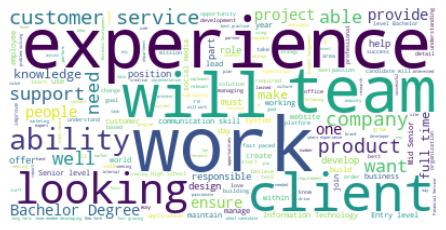

In [89]:
text = " ".join(i for i in df1['text'])
wordcloud = WordCloud(background_color = "white", max_words = 500).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 4.4.2- Most Common 25 Words

In [127]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df1['text'], 25)

In [128]:
df2 = pd.DataFrame(common_words, columns = ['kelime' , 'geçiş frekansı'])
fig = px.bar(df2, x = 'kelime', y = 'geçiş frekansı',
             hover_data = ['kelime', 'geçiş frekansı'], color='geçiş frekansı',
             title =' En çok geçen 25 kelime',
             height = 400,
             text_auto = '.3s')
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
#fig.bar_label(fig.containers[0], fmt='%g', label_type = 'edge', labels = df1['geçiş frekansı'])
fig.show()

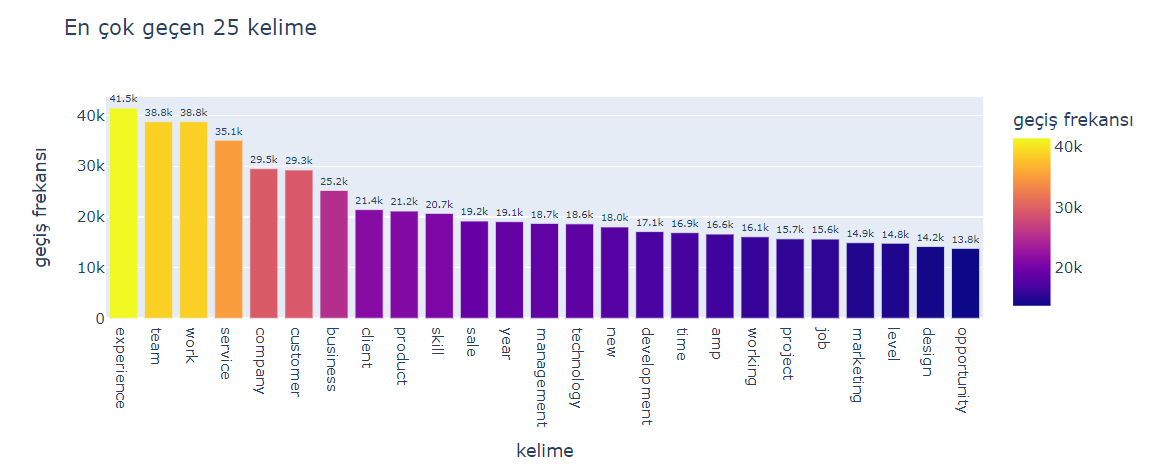

# 5- Bag of Words

In [92]:
max_features = 10000

In [93]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [94]:
# create the tokenizer
t = Tokenizer(num_words = max_features)
# fit the tokenizer on the documents
t.fit_on_texts(text_list)

In [95]:
encoded_docs = t.texts_to_sequences(text_list)

In [96]:
import joblib
joblib.dump(t, './tokinezer_file')

['./tokinezer_file']

### Embedding Representation

In [97]:
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)# all reviews must be same lenght. we equals all reviews lenght

[[   0    0    0 ...  132   26  667]
 [   0    0    0 ...  580   26  280]
 [   0    0    0 ...  568   24 1515]
 ...
 [   0    0    0 ...   10  646   11]
 [   0    0    0 ...   57  869   28]
 [   0    0    0 ...   27  122   36]]


# 6- Determine Dependent and Independent Variables

In [98]:
y = df1['freu'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
y = y.reshape(-1,1)
y.shape

(17880, 1)

In [100]:
X = np.array(embedded_docs)
X.shape

(17880, 1426)

# 7- Train and Test Split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

In [102]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (16092, 1426)
X_test shape :  (1788, 1426)
y_train shape:  (16092, 1)
y_test shape :  (1788, 1)


In [103]:
def eval_metrics(actual, prediction):
    print("Accuracy Score: {}".format(accuracy_score(actual, prediction)))
    print("Recall Score: {}".format(recall_score(actual, prediction)))
    print("f1 Score: {}".format(f1_score(actual, prediction)))

# 9- Modeling with Deep Learning 

## 9.1 BiDirectional LSTM 

### 9.1.1 Building Model

In [104]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(max_features,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(20 )))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

2022-11-16 12:50:08.998439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 12:50:08.999760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 12:50:09.006899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 12:50:09.007708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 12:50:09.008564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1426, 40)          400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 409,801
Trainable params: 409,801
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [106]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cp = ModelCheckpoint("./bidirectional_model/" ,save_best_only = True)## creaitng model checkpoint
hist = model1.fit(X_train, y_train, epochs = 5, batch_size = 64,  callbacks = cp, validation_data=(X_test,y_test))

2022-11-16 12:50:14.126671: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-11-16 12:50:18.089906: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


252/252 [==============================] - 28s 83ms/step - loss: 0.1914 - accuracy: 0.9518 - val_loss: 0.1169 - val_accuracy: 0.9575


2022-11-16 12:50:46.004939: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/5
252/252 [==============================] - 20s 81ms/step - loss: 0.0787 - accuracy: 0.9752 - val_loss: 0.1000 - val_accuracy: 0.9743
Epoch 3/5
252/252 [==============================] - 20s 81ms/step - loss: 0.0542 - accuracy: 0.9852 - val_loss: 0.0790 - val_accuracy: 0.9787
Epoch 4/5
252/252 [==============================] - 20s 81ms/step - loss: 0.0376 - accuracy: 0.9911 - val_loss: 0.0865 - val_accuracy: 0.9726
Epoch 5/5
252/252 [==============================] - 21s 82ms/step - loss: 0.0293 - accuracy: 0.9932 - val_loss: 0.0805 - val_accuracy: 0.9799


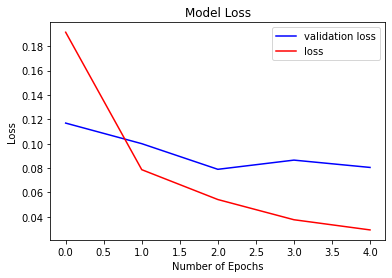

In [107]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

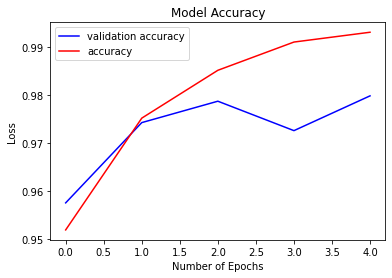

In [108]:
plt.plot(hist.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(hist.history['accuracy'], color='red', label="accuracy")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 9.2.2- Prediction and Eval Metrics

In [109]:
from tensorflow.keras.models import load_model
model1 = load_model("./bidirectional_model/")

In [110]:
y_pred = model1.predict(X_test)

In [111]:
y_pred = (y_pred > 0.5)

In [112]:
y_train_pred = model1.predict(X_train)

In [113]:
y_train_pred = (y_train_pred > 0.5)

In [114]:
print(confusion_matrix(y_test, y_pred))

[[1689   15]
 [  23   61]]


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1704
           1       0.80      0.73      0.76        84

    accuracy                           0.98      1788
   macro avg       0.89      0.86      0.88      1788
weighted avg       0.98      0.98      0.98      1788



In [116]:
eval_metrics(y_test, y_pred)

Accuracy Score: 0.9787472035794184
Recall Score: 0.7261904761904762
f1 Score: 0.7625


In [117]:
eval_metrics(y_train, y_train_pred)

Accuracy Score: 0.9918593089734029
Recall Score: 0.907928388746803
f1 Score: 0.9155383623468729
